# Android Data from PlayStore

In [46]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# load data
%run ./Preprocessing.ipynb
df = get_data()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
name               10841 non-null object
category           10841 non-null object
rating             9367 non-null float64
reviews            10841 non-null object
size               10841 non-null object
installs           10841 non-null object
type               10840 non-null object
price              10841 non-null object
content_rating     10840 non-null object
genres             10841 non-null object
last_updated       10841 non-null object
version            10833 non-null object
android_version    10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
Number of duplicate entries : 1181
Original values : ['Free' 'Paid' nan]
Unique genres before preprocessing : 118
 Apps with more than one genre : 393 
Unique genres : 48
Oldest updated app : 2010
Longest app name with 25 words : 591 housing transactions - renting houses, middle-class houses, new cases, 

# Standardization of the dataset

In [48]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scale = False
if scale :
    scaler.fit(df)
    df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index =df.index)
    

In [49]:
df.head()

,category,rating,reviews,size,installs,type,price,content_rating,genres,version,android_version,price_rounded,last_updated_days,last_updated_year,last_updated_day,last_updated_month_sin,last_updated_month_cos,name_wc
0,0,4.1,159,19000,10000,0,0.0,0,0,1.0,4.0,0.0,213,0,7,0.000000,1.000000,6
1,0,3.9,967,14000,500000,0,0.0,0,0,2.0,4.0,0.0,205,0,15,0.000000,1.000000,3
2,0,4.7,87510,8700,5000000,0,0.0,0,0,1.0,4.0,0.0,7,0,1,-0.500000,-0.866025,10
4,0,4.3,967,2800,100000,0,0.0,0,0,1.0,4.0,0.0,49,0,20,0.500000,-0.866025,6
5,0,4.4,167,5600,50000,0,0.0,0,0,1.0,2.0,0.0,500,1,26,0.866025,0.500000,3


# Exploratory plots
We plot some data, to see its ranges

In [43]:
features = df.columns.values

Histogram of features


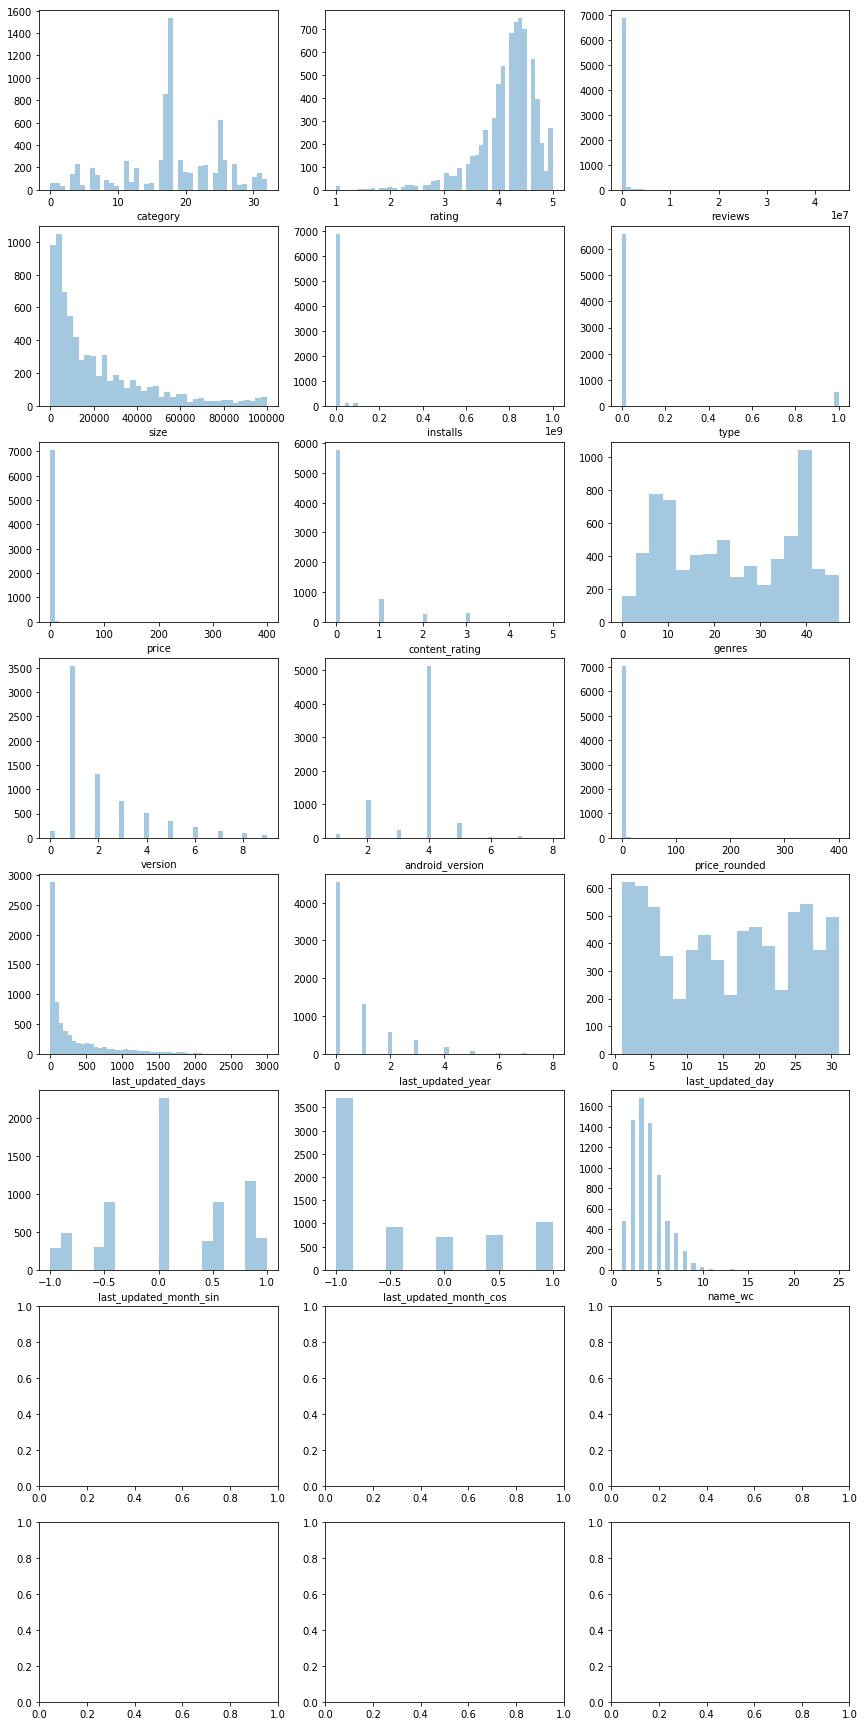

In [591]:
# features = ['rating', 'size', 'installs']
ncols = 3
nrows = len(features) // ncols + 2
fig, axs = plt.subplots(nrows = nrows, ncols = ncols);
# fig.suptitle('Distributions for features', fontsize = 15);
print('Histogram of features')
cidx = 0
ridx = 0
for idx, feature in enumerate(features):
    sns.distplot(df[feature], kde = False, ax = axs[ridx][cidx] )
#     axs[ridx][cidx].hist(df[feature])
#     axs[ridx][cidx].set_xlabel(feature)
    if cidx == ncols - 1:
        ridx += 1
        cidx = 0
    else :
        cidx += 1
fig.subplots_adjust(right = 2, top = 6);

# To do 
- plot some more feature pairs, try more things

In [619]:
features

array(['category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'version', 'android_version',
       'price_rounded', 'last_updated_days', 'last_updated_year',
       'last_updated_day', 'last_updated_month_sin',
       'last_updated_month_cos', 'name_wc'], dtype=object)

In [620]:
plot_features = ['category', 'rating', 'reviews', 'size', 'installs', 'type', 'price_rounded','content_rating', 'genres', 'version', 'android_version',
                'name_wc']

In [44]:
log_features = ['rating', 'reviews', 'size', 'installs', 'android_version', 'name_wc']

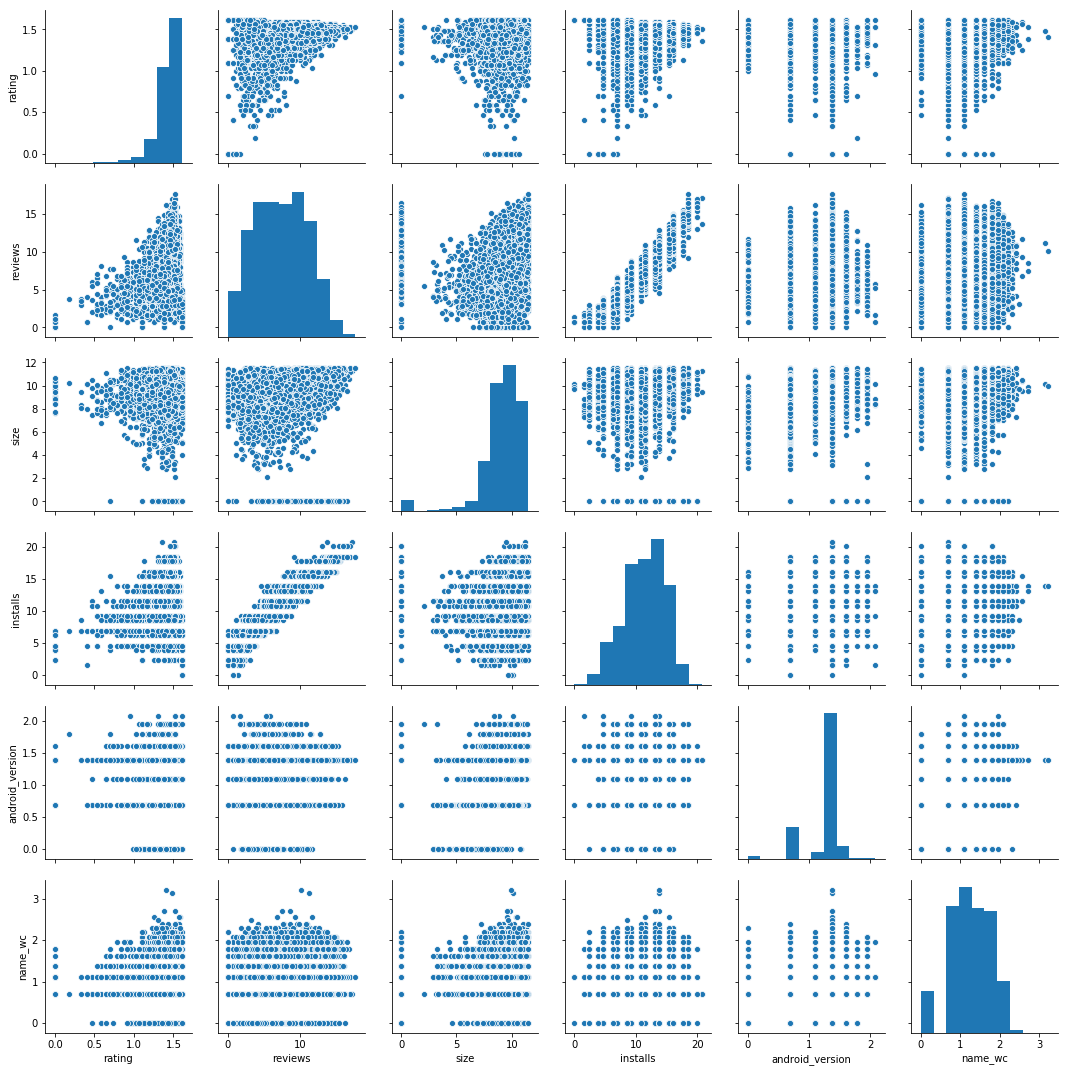

In [45]:
sns.pairplot(np.log(df[log_features]))

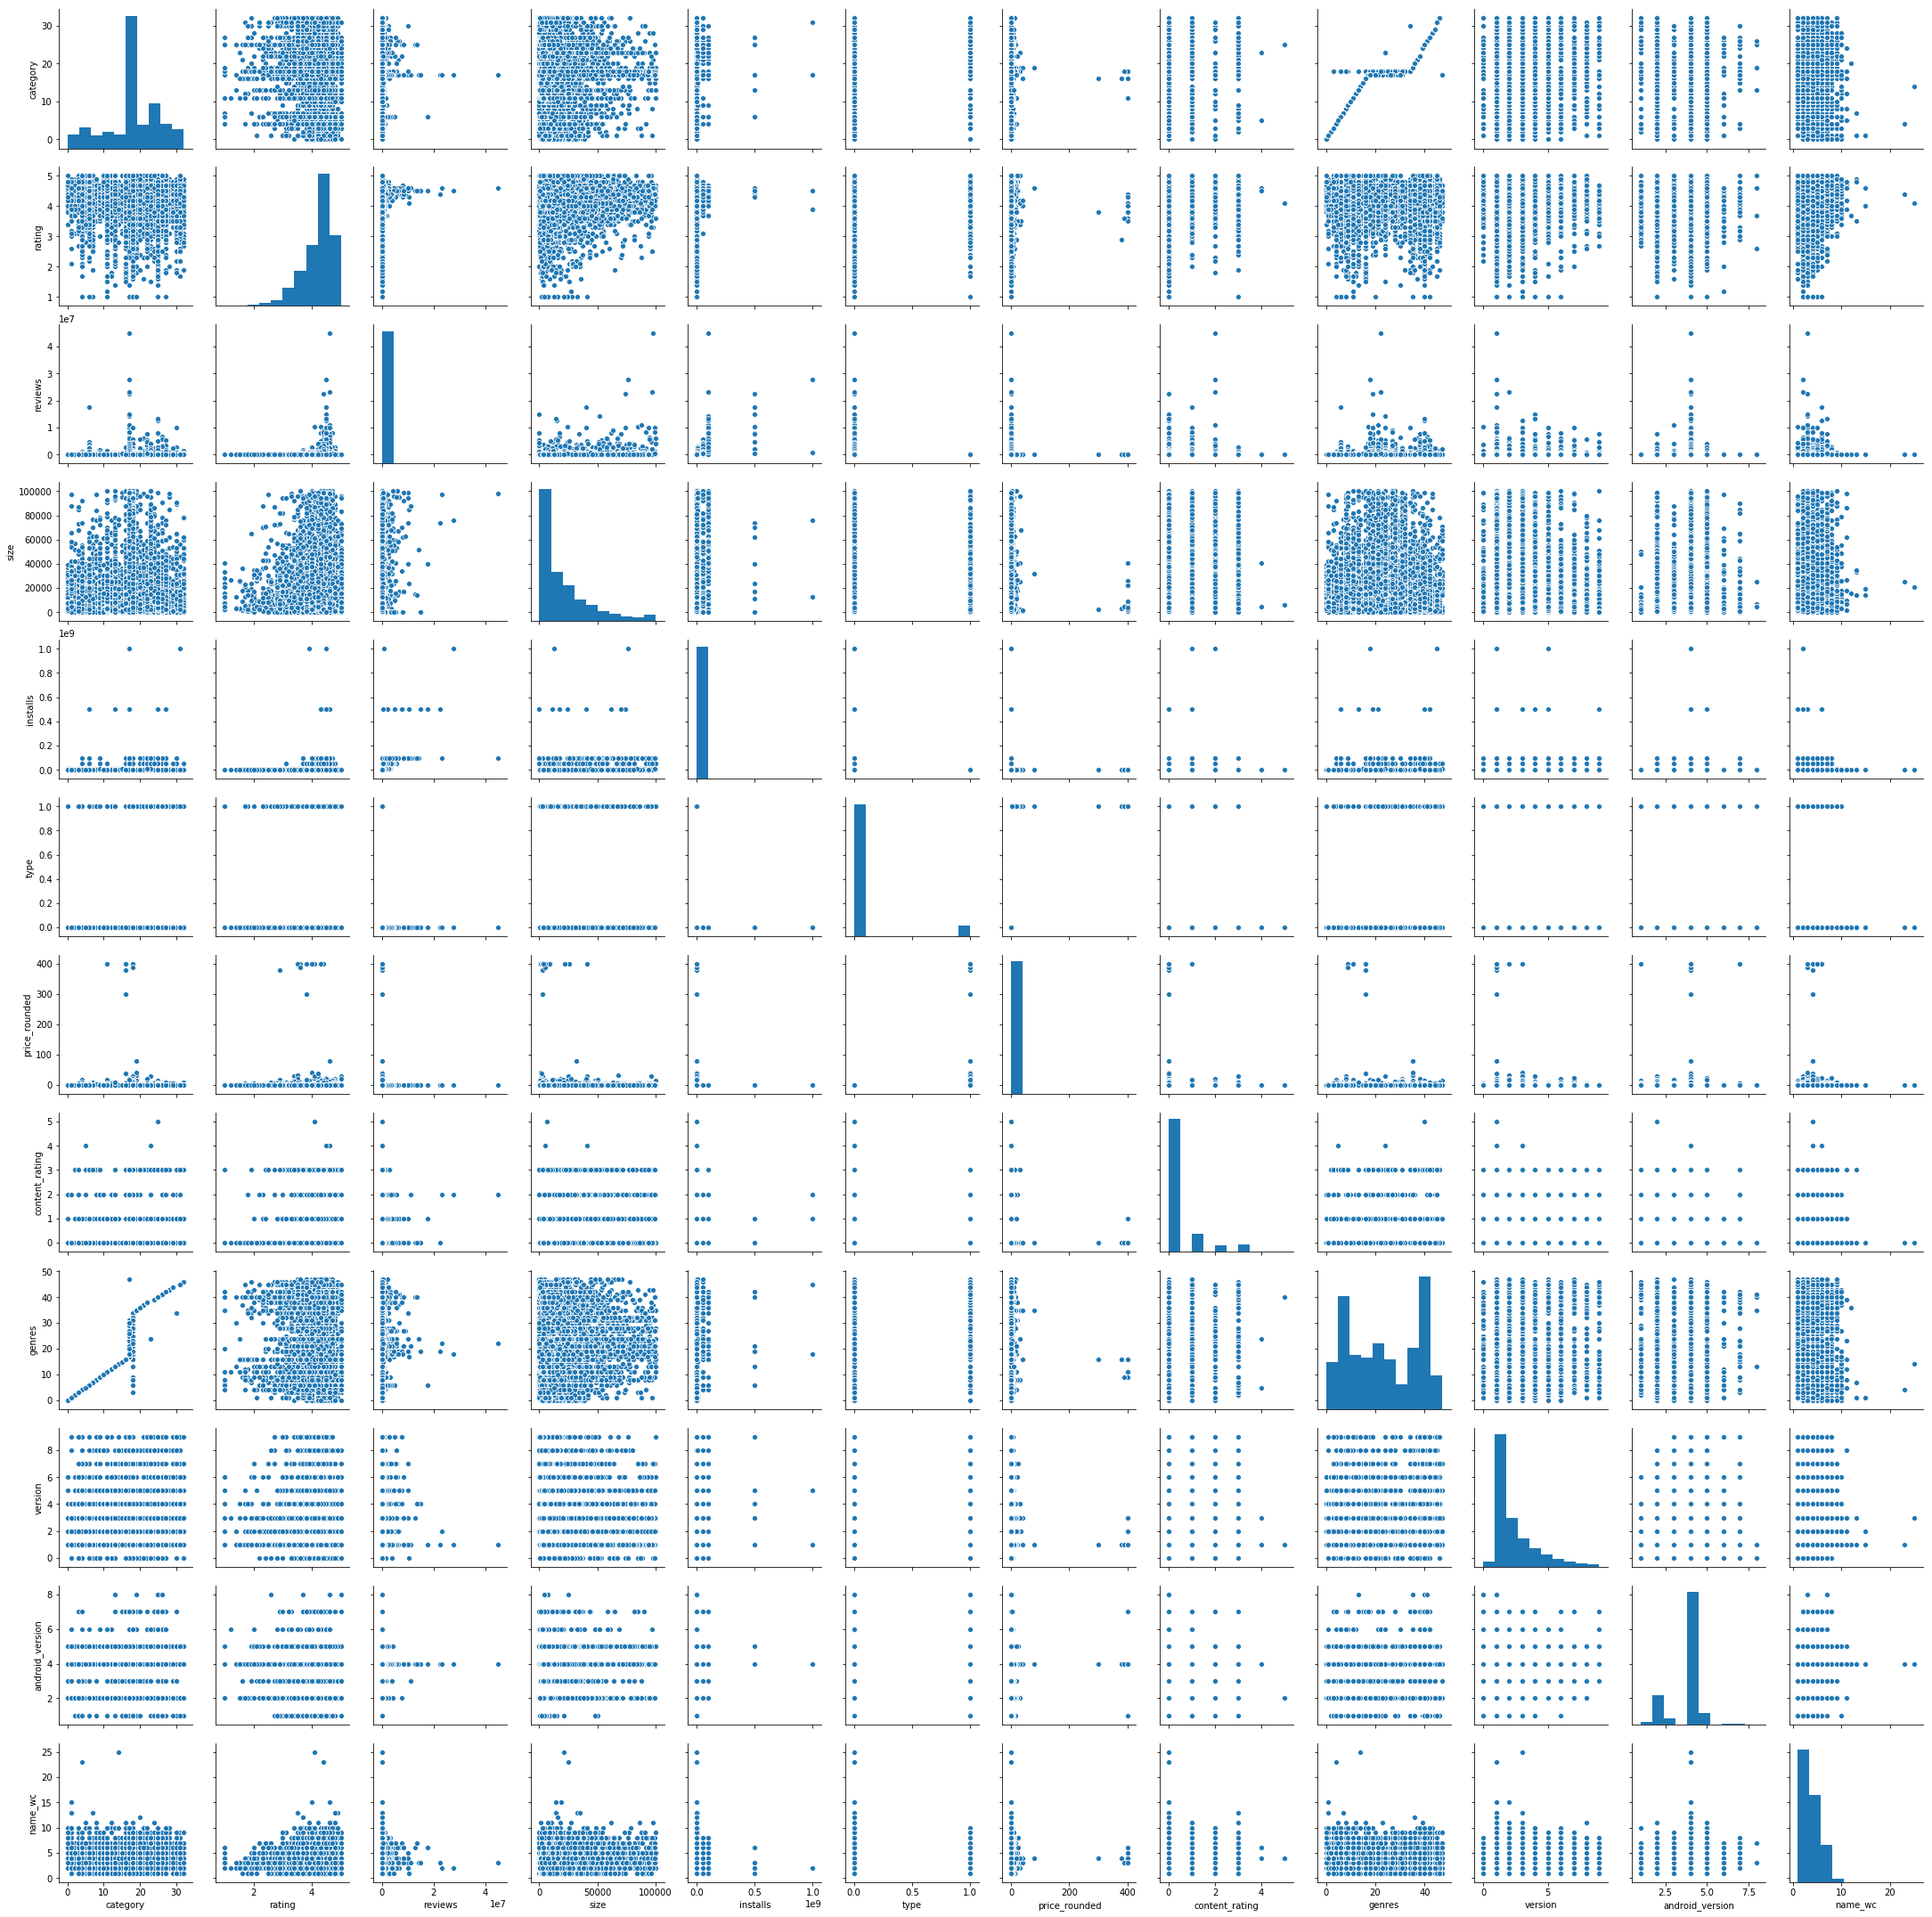

In [594]:
sns.pairplot(np.log(df[plot_features]))

<Figure size 864x504 with 0 Axes>

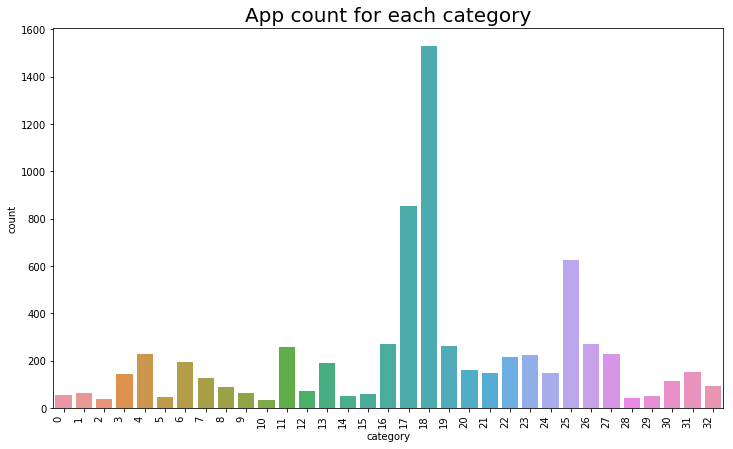

In [595]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x='category', data=df)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
_ = plt.title('App count for each category',size = 20)

<Figure size 720x576 with 0 Axes>

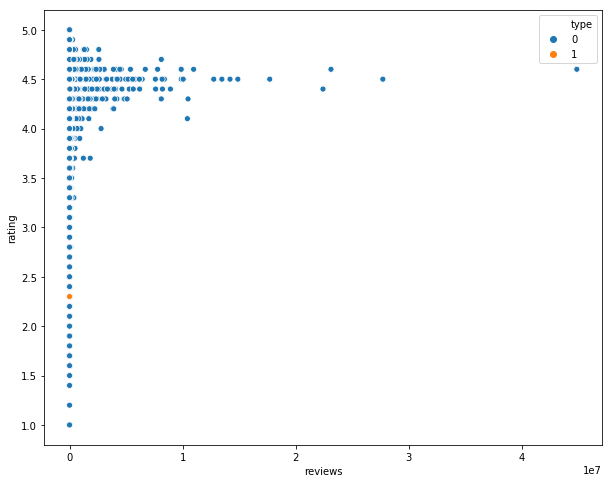

In [596]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='reviews', y='rating', data=df, hue='type')

### Let's visualize the correlation between features

#### Correlation between "rating" and the other features

In [46]:
correlation = df.corr()['rating']
correlation

category                 -0.035616
rating                    1.000000
reviews                   0.072053
size                      0.056996
installs                  0.053422
type                      0.040201
price                    -0.021422
content_rating            0.012516
genres                   -0.033064
version                   0.000562
android_version           0.057804
price_rounded            -0.021447
last_updated_days        -0.126055
last_updated_year        -0.122396
last_updated_day         -0.008878
last_updated_month_sin   -0.004782
last_updated_month_cos   -0.096258
name_wc                   0.118556
Name: rating, dtype: float64

<Figure size 1080x360 with 0 Axes>

Text(0, 0.5, 'Correlation to "rating"')

<BarContainer object of 18 artists>

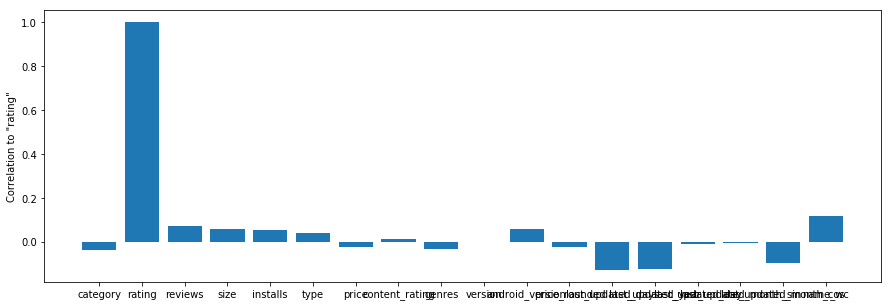

In [626]:
plt.figure(figsize=(15,5))
plt.ylabel('Correlation to "rating"')
plt.bar(correlation.index.values, correlation)


**Observations**

- *rating* is correlated the most with *last_year_updated*
- *rating* also has some intersing negative correlations


#### Correlation between all features
- todo : enlarge plot to visualize better

<Figure size 800x640 with 0 Axes>

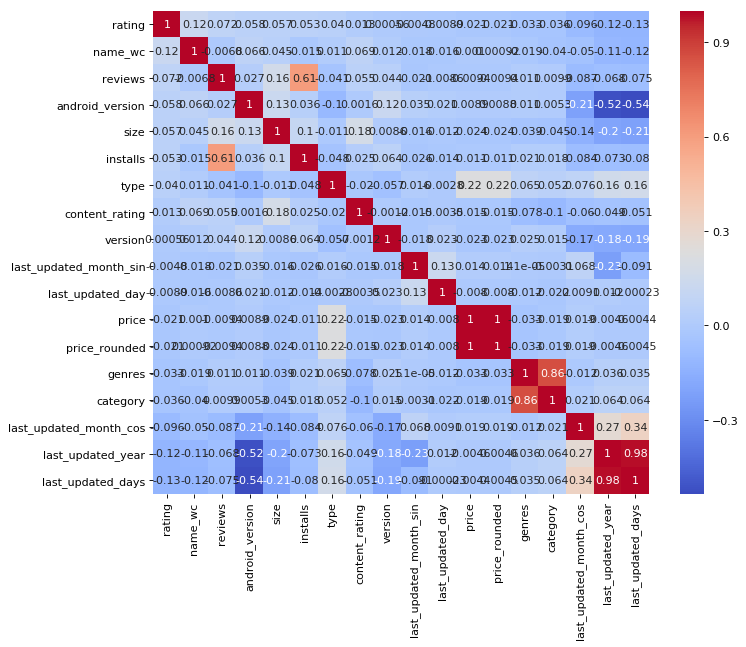

In [598]:
k = len(df.columns.values) #number of variables for heatmap
cols = df.corr().nlargest(k, 'rating')['rating'].index
cm = df[cols].corr()

# enlarge plot
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

# plot heatmap
sns.heatmap(cm, annot=True, cmap = 'coolwarm')

**Observations**

- *reviews* and *installs* are strongly correlated
- *size* and *last_year_updated* may be somehow related

In [599]:
# Below you can find an example that find a linear model between 'Reviews' and 'Installs' that works well
# It predicts number of 'Reviews' based on 'Installs' with an R squared error of 0.92 

# A linear model

In [627]:
# we use .values because the ML models work with numpy arrays, not pandas dataframes
Y = df['reviews'].values
X = df[['installs']].values

In [33]:
# In some cases we may need to scale data. There are many types of scallers in the preprocessing module. 
# Here is an example

# from sklearn import preprocessing
# scaler = preprocessing.MinMaxScaler()
# X = scaler.fit_transform(X)
# Y = scaler.fit_transform(Y.reshape(-1,1)).squeeze()

In [628]:
# when creating a ML model, we split data in train and test 
# we train the model on the train data and evaluate its performance on the test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [629]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
print('Train R squared : %.4f' % lr.score(x_train,y_train))
print('Test R squared : %.4f' % lr.score(x_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Train R squared : 0.3566
Test R squared : 0.4893


In [630]:
X_log = np.log(X)
Y_log = np.log(Y)
x_train, x_test, y_train, y_test = train_test_split(X_log, Y_log, test_size = 0.2, random_state = 42)

In [631]:
lr.fit(x_train, y_train)
print('Train R squared : %.4f' % lr.score(x_train,y_train))
print('Test R squared : %.4f' % lr.score(x_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Train R squared : 0.9044
Test R squared : 0.8994


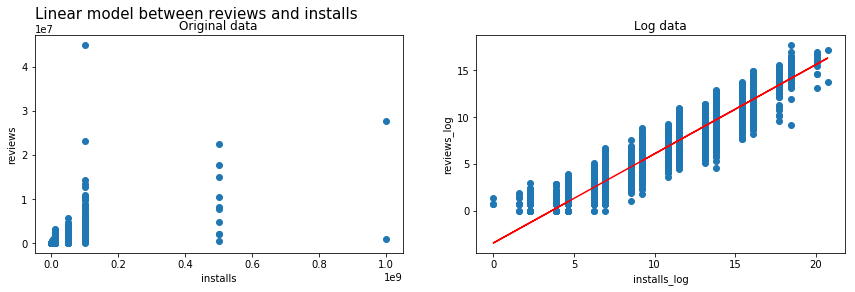

In [632]:
df.columns
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2);
fig.suptitle('Linear model between reviews and installs', fontsize = 15)
fig.subplots_adjust(right = 2)
ax1.set_title('Original data')
ax1.scatter(X, Y);
ax1.set_xlabel('installs');
ax1.set_ylabel('reviews');
ax2.set_title('Log data')
ax2.scatter(X_log[:,0], Y_log);
ax2.set_xlabel('installs_log')
ax2.set_ylabel('reviews_log');
y_pred = lr.predict(X_log)
ax2.plot(X_log[:,0], y_pred, c = 'red');